## Description

In this concept  we start by pondering on how we are able to go from visual stimuli to perceptions and learn the process of formulating a way to make computers replicate this. We start by looking at how images are stored in computers and then look at some representations that help computers perceive better. We review deep representations and explore methods to make it intepretable and explainable.

## Prerequisites

* Python (along with NumPy)
* Basic understanding of machine learning (sklearn)
* Comfort in handling image processing routines(skimage,opencv)
* Familiarity with convolutional neural network architectures (such as alexnet,vgg etc)

## Learning Outcomes


* In first chapter, we learn about desirable properties of such representations  and then look at some traditional transformations like HOG  and how deep learning based representations differ from it.
* In second chapter we learn to extract features from pre-trained models and also how to visualise high dimensional data. 
* In third chapter we look at methods that help us understand what a model has learned.
* In the final chapter we get introduced to tools that can help in diagnoising model results.

## 1.1 Human Perception:
Our sense of visual perception help us understand the world around us and enable us perform a variety of tasks like navigation. For example,lets assume that you are driving a car and you encounter the below scenario through your eyes.

<img src= '../images/cat_on_road.jpeg'>


Light reflected from the object results in visual stimuli on your eyes and your brain processes the received sensory information, recognises there is an adorable cat on your way and instructs your legs to step on the break pedal. Though we are all able to perform similar feat effortlessely, it's still hard for us to reason how we are able to do this. Humans are capable of associating a concept(cat) to certain kind of sensory patterns. Through millions of years of evolution our brain has acquired the necessary hardware to carry out such processing. Equipped with this hardware, the human baby goes from not being able to recognize a cat to being able to distinguish a cat from dog by just looking at few examples.<br>

## 1.2 Representation for Computer Vision

Computer vision is the process of understanding real world through the images acquired from digital cameras. It has applications in various fields ranging from automated driving, retail, medical imaging to name a few. And we might want to extract different kinds of information from the scene. In case of automated driving , looking at the image received from the front of  a camera, we might want to find out what is the safe path to drive (Image Segmentation), if there are any pedestrians on our way (Object detection) , distance from the car infront(Depth Estimation).  Each of this task demands our digital images stores as a bunch of numbers to a form where they can help us extract the information that we seek about the real world. 

It can also be said that computer vision is the act of applying machine learning to image data.It would have been more convenient if we had known how our brain stores and process images.  Let's start by looking at how images are represented in computers. We capture the 3D world around us and project them on  to a 2D screen within the camera. Images are represented in a 2D grid of fixed size and each point in the grid stores three numerical values corresponding to Red,Green and Blue components of the scene.<br>

<img src = "../images/computer_cat.png" >

Image credit : Lecture 1: http://cs231n.github.io/

In this example, the cat image is 248 pixels wide, 400 pixels tall, and has three color channels Red,Green,Blue (or RGB for short). Therefore, the image consists of 248 x 400 x 3 numbers, or a total of 297,600 numbers. Each number is an integer that ranges from 0 (black) to 255 (white). That's already a quarter million numbers for a relatively smaller image and if we use this in this form our learning algorithms might take forever to learn due to computational complexity. Hence there is a need to transform this array of numbers in to a form that keeps our learning algorithms tractable and also aid them in their task.

### 1.3 Desirable Properites
Objects in real world could exhibit variations and the image representation we chose should be roboust to such variations. We list below some of the variations,<br>

* ViewPoint variation - Different  perspectives of the camera might result in different images.
* Scale  - The same object could exist in different sizes .
* Deformation - Non-rigid objects appear to exist in many different possible forms.
* Occulsion - Sometimes only a part of the object appears.
* Illumination condition - Depending on the lighting condition, the captured image varies.
* Background Clutter  - When the object is hard to distinguish from the background.
* Intraclass Variance - Objects of the same class might have different visual appearance.

<img src ="../images/challenges.jpeg" >


Due to such variations the pixels we observe might have different values inspite of having the same real world object in it. To achieve our goal of  visual perception (Object recognition, Object localisation etc..) the image representation should have certain desirable properities.<br>

* Ignore irrelevant variations - The representation should not vary with environmental changes such as lighting or any other change that doesn't affect the object identity. For example when our task is to distinguish a bat from a ball, the representation needn't change when the color of the object changes.
* Capture discriminatory information - The representation should capture all distinguishing variations - for example when our task is to distinguish a red ball from yellow ball, the representation should vary for each of these colors.


Thus a good representation exhibits invariance to external changes and discrimination between object and other components of the image. It is important to note that the representation can be judged only based on the task it is employed for.<br>




Image and content credit : Lecture 1 :http://cs231n.github.io/

## 1.3  Shallow Representations:

 Before deep learning became successful, computer vision research was mostly about finding appropriate transformations that can be aid in different tasks. They can either be refered as image preprocessing or image features.They are now considered as shallow representations when compared with deep learning based learned representations. Below we look at some of the transformation and later in the chapter we will understand how deep learning encompasses all of it and has made it unnecessary to design transformations manually. 
 
## 1.3.1 Point wise operations

These are the most basic transformation where each pixel is replaced with a new value based on it's current value.<br>
Few examples of this kind are, <br>
    1.Image inversion - Subtract the current pixel intensity from the maximum value a pixel can take.<br>
    2.Image thresholding - Pick a threshold and set pixels above a threshold to one and the others to zero.<br>
    3.Contrast Adjustments - Stretch or compress the range of pixel intensities present in the image by defining a  exponential/logarthmic transformation.<br>
    
   

    

Let us look at an example , where we have white text on black background. Some OCR's like tesseract recognize black text on white background better,hence we need to invert this image.

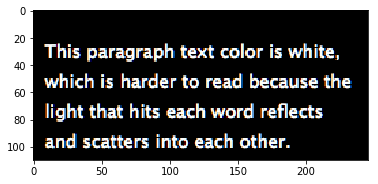

In [1]:
## REFERENCE

#import packages


import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


#load a image that has white text on black background
white_text = cv2.imread("../images/white_text.png")
plt.imshow(white_text)

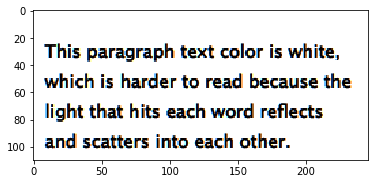

In [2]:
#Perform inversion
inverted_text = cv2.bitwise_not(white_text)
plt.imshow(inverted_text)

Above is an example of a pointwise image transformation which helps us get better result in our task (OCR).

## 1.3.2 Group Operations

Group operations compute new pixel values from a pixel's neighbhourhood by using a window typically square shaped. An example is convolution where we define a window with fixed weights is defined.New pixel values are computed by placing the window  at the point of interest,pixel values are computed by multiplying by corresponding window weights and summing it up. The sum replaces the pixel value at the point of interest. Such windows are commonly  refered as filters in image processing parlance.

Few examples are ,

1. Averaging filter
2. Median/Mode filter 
3. Sobel edge detector


These kind of operations describe the local structure in an image. But to enable perception from an image, we need descriptors that summarise the content in entire image.



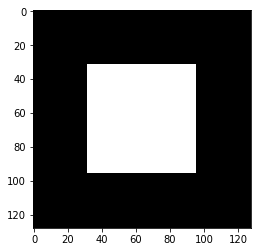

In [3]:
## REFERENCE 

#Let us generate an image with a square box in it and then take gradient of it

# Generate image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1
plt.imshow(im,cmap="gray")

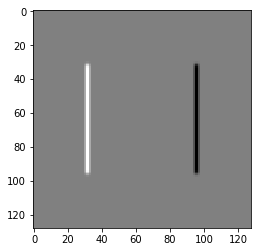

In [4]:
## Sobel operation on x-direction
sobel_img=cv2.Sobel(im,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobel_img,cmap="gray")


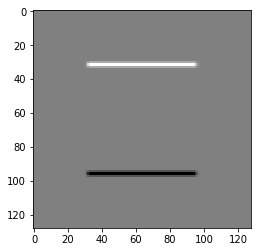

In [5]:
## Sobel operation on y-direction

sobel_img=cv2.Sobel(im,cv2.CV_64F,0,1,ksize=5)
plt.imshow(sobel_img,cmap="gray")

In the above example the value for an output pixel is based on its neighbhouring pixels as well.

## 1.3.4 Histograms:

The intensity histogram shows how individual brightness levels are occupied within an image. By looking at the histogram we can decide the threshold for binary classification. Histogram is one of the very primitive way of summarising the entire image content. 

Several image descriptors like SIFT,HOG extend the concept of histograms and produce more robust descriptors of an image which can then be used by machine learning algorithms. We will take a look at Histogram of Oriented gradients(HOG).

In [6]:
from skimage import data
from skimage.exposure import histogram

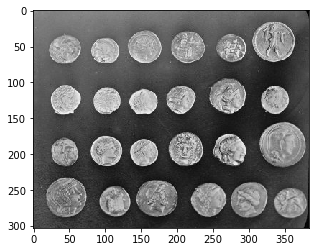

In [7]:
coins = data.coins()
plt.imshow(coins,cmap=plt.cm.gray)

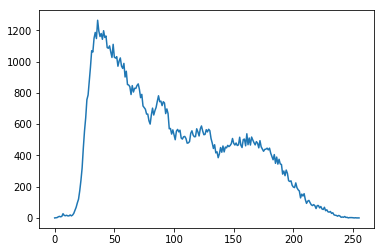

In [8]:
histr = cv2.calcHist([coins],[0],None,[256],[0,256]) 

plt.plot(histr)

From the histogram we could infer that most of the image has intensity value below 100 and they correspond to the dark regions in the image. The task of separating the object(coin) from the background now reduces to picking an appropriate threshold. 

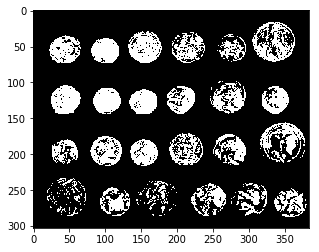

In [9]:
threshold = 150

thresholded_image = coins >150

plt.imshow(thresholded_image,cmap=plt.cm.gray)

But the same  threshold might not work for all images due to difference in lighting and view point. We need to have features that are invariant to such variations. Moving from intensity to gradient of intensity gives some robustness to lighting variations, since it looks only for differences between adjacent pixels. Next we look at one such feature which was designed to characterise shape of objects .

## 1.3.5  Histogram of Oriented Gradients

Histogram of Oriented Gradients(HOG) is a transformation which characterises a given image by counting the number of times different gradient occurs in a image. It's a feature that is suited to describe shapes and was first proposed for the task of human detection.


<#TODO - Either give a  link to HOG described in earlier modules or an external blog link. removing the description we had earlier , since description of shallow features is not the intention of this module.>


Let us use scikit-image to compute histogram of an image.

/home/peerless/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


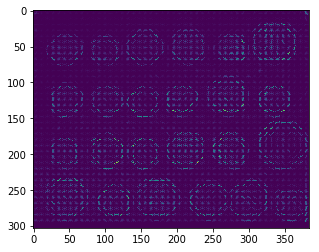

In [10]:
## REFERENCE

#import required modules from skiimage
from skimage import exposure
from skimage import feature
from skimage import data


im = data.coins()
(H, hogImage) = feature.hog(im, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True,block_norm="L1",
                visualise=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

plt.imshow(hogImage)

'hogImage' is a representation that still represents the original image but robust to lighting changes. Based on the task vision researchers have designed multiple feature extractors like LBP,SIFT,BRIEF,Gabor filters etc. <skimge link>

## Dataset Exploration

Let us load the fashion-mnist dataset and explore the dataset.

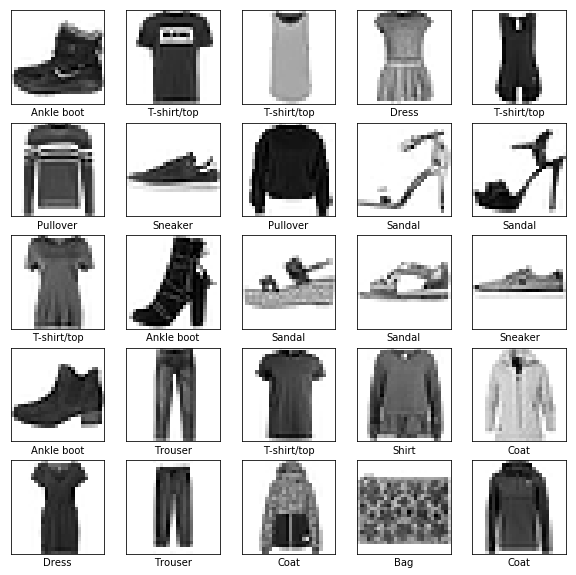

In [11]:
#REFERENCE

#Import required packages


from tensorflow import keras


#load the inbuilt dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#plot some images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


We could see that sandal and sneaker are almost of similar shape, lets create a subset of the dataset with these two classes.

In [12]:
#REFERENCE

#Make a subset of the dataset with two target classes- sandal and sneakers


def get_train_test_for_class(class_index):
    '''
        Get subset of the dataset for specified class
    '''
    class_train_labels = train_labels[train_labels==class_index]
    class_train_images = train_images[train_labels== class_index]
    
    class_test_labels = test_labels[test_labels==class_index]
    class_test_images = test_images[test_labels== class_index]
    
    return class_train_labels,class_train_images, class_test_labels,class_test_images



sandals_train_labels,sandals_train_images,sandals_test_labels,sandals_test_images = get_train_test_for_class(5)
sneakers_train_labels,sneakers_train_images,sneakers_test_labels,sneakers_test_images = get_train_test_for_class(7)



train_images = np.concatenate((sandals_train_images,sneakers_train_images))

train_labels = np.concatenate((sandals_train_labels,sneakers_train_labels))

test_images = np.concatenate((sandals_test_images,sneakers_test_images))
test_labels = np.concatenate((sandals_test_labels,sneakers_test_labels))



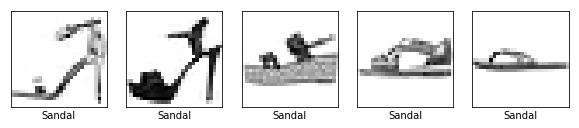

In [13]:
#REFERENCE

#visualise sandals
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

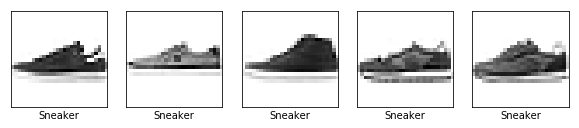

In [14]:
#REFERENCE

#visualise sneakers
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[6000+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[6000+i]])
plt.show()

In [15]:
#REFERENCE

#let us use image intensity as the feature.

train_features = [image.flatten()/255.0 for image in train_images]
test_features = [image.flatten()/255.0 for image in test_images]

In [16]:
#import SVM

from sklearn.svm import SVC

# Create a model and fit the training data
model = SVC(kernel = "rbf", C = 50, gamma =0.50625)
model.fit(train_features, train_labels)

#make predictions and determine accuracy
preds = model.predict(test_features)
print("Accuracy:" , model.score(test_features, test_labels))


from sklearn.metrics import confusion_matrix


mat = confusion_matrix(test_labels, preds, labels = [5,7])
print("Confusion matrix")
print(mat)

Accuracy: 0.75
Confusion matrix
[[998   2]
 [498 502]]


We see that the model is biased towards one class and hence the accuracy drops

## Task

1. Write a function to compute HOG of a given image using skimage.
2. Fit a SVM classifier to distinguish between sneakers and sandals employing HOG features.
3. Make predictions for test set and compute accuracy.

In [17]:
# Task:

#Write a function to compute HOG of a given image using skimage

def compute_hog(image,orientations=9,pixels_per_cell=(4,4),cells_per_block=(2,2)):
    hog= feature.hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block, transform_sqrt=True,block_norm="L1")
    return hog

In [18]:
#Task

#compute hog
train_features = [compute_hog(image)for image in train_images]
test_features = [compute_hog(image)for image in test_images]

#fit SVM
from sklearn.svm import SVC

model = SVC(kernel = "rbf", C = 50, gamma =0.50625)
model.fit(train_features, train_labels)

#make predictions
preds = model.predict(test_features)
print("Accuracy:" , model.score(test_features, test_labels))

mat = confusion_matrix(test_labels, preds, labels = [5,7])
print("Confusion matrix")
print(mat)


Accuracy: 0.983
Confusion matrix
[[984  16]
 [ 18 982]]


We see that the model is biased towards one class and hence the accuracy drops.

# From Shallow to Deep representations:

The main objective of feature learning is to provide representations that makes it easier for the machine learning classifier that follows it. If it's classification, then the different classes should be more discriminative in the transformed feature space than in the original image space. Researchers have often designed feature transformations addressing a specific task , for example, Local Binary Pattern was designed for texture identification, HOG for pedestrain detection.  Priror to deep learning, computer vision practioneers had to either select one of these feature transformations or a combination of them.  We have already learned that feature extractors could either be describing a small portion of the image like gradient image (Local Descriptors) or could be describing an entire image like histograms (global descriptors).  <break>
    
When using local descriptors to make a decision about the entire image, we have to concatenate images from different regions to arrive at the final descriptor. The final descriptor is then used by a supervised machine learning algorithm. Prior to deep learning most of the computer vision pipeline looked as illustrated below.

<img src ="../images/shallow_vision.png" >

We have already learnt that deeplearning has made a revolutionary impact in computer vision in earlier module. In deep learning, the feature transformation is also converted as a learning task along with the final classification task. A hierachy of trainable feature transforms are set up and the feature transforms are learned from data instead of having to design them. Since feature learning is closely tied with the task in hand, the model ends up learning features that are more cohesive to solving the specific chosen task. 

A typical classification pipeline will look as illustrated below,

<img src ="../images/deep_pipeline.png" >

These models got the name 'deep' in them because as we move down the hierachy the features learned represent a larger section of the image. We go from learning local features in first layer to more abstract and global features in deeper layers. 

While the classification accuracy has been considerably improved , there is a common criticism that unlike the handcrafted features the features in a deep learning model are not explainable. It's harder to reason why a deep learning model has made a decision.

<img src ="../images/deep_vision.png" >



Explainability is not only desired but important when deploying deep learning models for certain tasks like medical imaging , law enforcement etc. In the last decade there had been considerable effort in the research community to understand deep representations and to explain a deep learning model's decision. In the subsequent chapters we will learn some tools to visualise deep representations, techniques to explore the information contained in deep representations and also reason for the decision made by deep learning model.

Image credits : [Deep learning tutorial by Yann Lecun and  Marc Aurelio](https://cs.nyu.edu/~yann/talks/lecun-ranzato-icml2013.pdf)

# Task 

1. Create a 3 layer deep CNN model using keras
2. Train the model for a binary classification problem to distinguish between sneakers and sandals.
3. Measure its accuracy

In [19]:

#Normalise the images
train_images = train_images / 255.0
test_images = test_images / 255.0

#Change the number of dimensions since keras api requires it
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)


In [20]:
# create a CNN model using keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Construct a sequential model
model = keras.Sequential()

#The Input Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#Add 2 Conv Layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# output Layer
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [21]:
# Get the model compiled
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Train the model.
model.fit(train_images, train_labels, epochs=20)

Train on 12000 samples
Epoch 1/20
   32/12000 [..............................] - ETA: 9:28

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at /home/peerless/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_1301]

Function call stack:
distributed_function


In [ ]:
#Measure the accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Though we don't see much difference in this case, the difference becomes apparent when the dataset is larger and the task is difficult.

## Quiz


1. **Considering a task of tracking a football during a match,which among the following properties are desirable  ? **

    A.Should be invariant to rotation of the image. <br>
    B.Should vary proportionally to the distance from the goal post  .<br>
    C.Should be robust to illumination changes<br>
    D.Should vary appropriately based on the  team of the player closer to the ball<br>
    
    1 . Only A <br>
    2 . B and D <br>
    3 . A and C <br>
    4 . A,B,C and D
    
    
    Answer:  3 . 
    
    Explanation : The objective is only to track the ball and hence the representation should be robust to identify the ball and not any other attributes of the game.
    


2. Which among the following is not pixelwise operation?

    1 . Image inversion <br>
    2 . Contrast Enhancement <br>
    3 . Image Blurring <br>
    4 . Image Thresholding <br>

    Answer 3:

        Explanation: Image blurring is achieved through filters like average filtering, which is a convolution operation that involves a block of pixels.

3. What is the crucial reason behind good performance of deep learning based classsifiers compared with shallow features.

    1 . Deep learning focuses directly on semantic meaning of images.<br>
    2 . Deep learning uses GPU that are more powerful than CPU <br>
    3 . Deep learning can operate even with small number of training data <br>
    4 . The representations learned by deep networks are hierachial and capture both global and local features.<br>


    Answer 4:
        The earlier layers in a deep network capture local features like edges, while the deeper layers contain global features.
        This hierachy enables higher representation power to deep networks compared with shallow features.